In [442]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

In [443]:
#글씨설정
plt.rc("font",family="Malgun Gothic")
sns.set(font="Margun Gothic",rc={"axes.unicode_minus":False},style='darkgrid')
mpl.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False

#맷플롯립 한글 설정
font_path = r'C:\Users\dudtj\OneDrive\Desktop\금융데이터\NanumFontSetup_TTF_ALL'
fontprop = fm.FontProperties(fname=font_path, size=18)

In [444]:
data = pd.read_csv(r'C:\Users\dudtj\OneDrive\Desktop\python\금융데이터\금융보안원_경진대회_데이터(최종제출)1.csv',encoding='euc-kr')

In [445]:
#매출금액 단위 만원으로 변환 
data['매출금액'] = data['매출금액']/10000
data.rename(columns={'매출금액' : '매출금액(단위:만원)'}, inplace=True)

In [446]:
data.loc[(data.품목대분류명=='인테리어'),'품목대분류명']='기타'
data.loc[(data.품목대분류명=='가구'),'품목대분류명']='기타'
data.loc[(data.품목대분류코드=='13'),'품목대분류코드']='99'
data.loc[(data.품목대분류코드=='14'),'품목대분류코드']='99'

In [447]:
grouped = data['매출금액(단위:만원)'].groupby(data['품목대분류명']).sum()
df_g = pd.DataFrame(grouped)
df_g=df_g.sort_values(by=['매출금액(단위:만원)'])

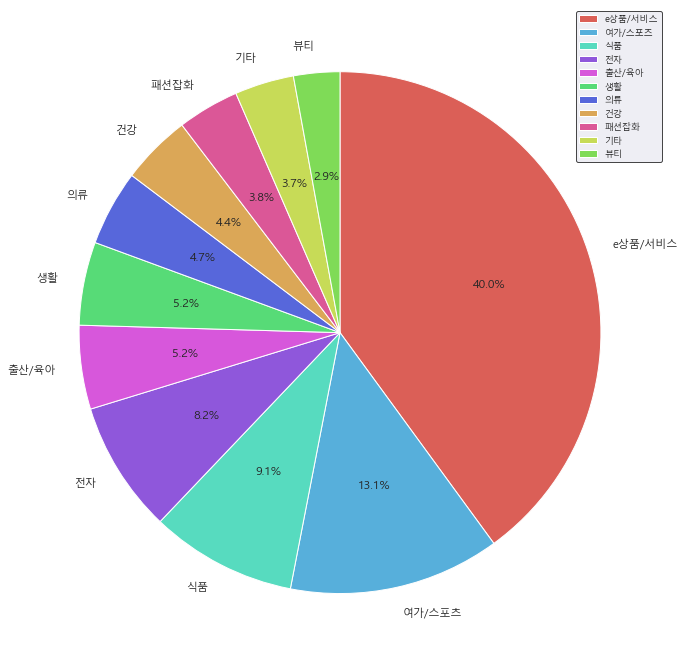

In [448]:
import matplotlib.pyplot as plt
import numpy as np

## 데이터 준비
colors = sns.color_palette('hls',len(labels)) ## 색상
labels = data['매출금액(단위:만원)'].groupby(data['품목대분류명']).sum().index## 라벨
frequency =data['매출금액(단위:만원)'].groupby(data['품목대분류명']).sum() ## 빈도
 
## 데이터 라벨, 빈도수, 색상을 빈도수를 기준으로 정렬해야한다.
labels_frequency = zip(labels,frequency,colors) 
labels_frequency = sorted(labels_frequency,key=lambda x: x[1],reverse=True)
 
sorted_labels = [x[0] for x in labels_frequency] ## 정렬된 라벨
sorted_frequency = [x[1] for x in labels_frequency] ## 정렬된 빈도수
sorted_colors = [x[2] for x in labels_frequency] ## 정렬된 색상
 
fig = plt.figure(figsize=(12,12)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 배경색을 하얀색으로 설정
ax = fig.add_subplot() ## 프레임 생성

pie = ax.pie(sorted_frequency, ## 파이차트 출력
       labels=sorted_labels,
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계방향으로 그려짐
       colors = sorted_colors,
       autopct= '%1.1f%%' ## 색상 지정
       )

plt.legend(pie[0],sorted_labels,loc='upper right',fontsize=9,edgecolor='k') ## 범례
plt.show()

####인테리어 가구 기타

In [477]:
data_f = data[data['품목대분류명'] == '식품']
data_f=data_f[['매출금액(단위:만원)','매출건수']]

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 객체생성
scaler = StandardScaler()

# fit -> transform
scaler.fit(data_f) # data_f는 2차원 이상의 값이어야 함
data_f_scaled = scaler.transform(data_f)

# 배열형태로 반환되기 때문에 데이터 프레임으로 변환해주는 작업
data_f_scaled = pd.DataFrame(data = data_f_scaled)


# *** 만약 특정 열의 스케일링을 하고 싶은 경우 ***
A_n = scaler.fit_transform(data_f['매출금액(단위:만원)'].values.reshape(-1,1))
data_f.insert(0, '식품_매출금액(단위:만원)_scaled', A_n)
data_f.drop(['매출금액(단위:만원)'], axis=1, inplace=True)
B_n = scaler.fit_transform(data_f['매출건수'].values.reshape(-1,1))
data_f.insert(0, '식품_매출건수_scaled', B_n)
data_f.drop(['매출건수'], axis=1, inplace=True)


In [455]:
data_s = data[data['품목대분류명'] == '여가/스포츠']
data_s=data_s[['매출금액(단위:만원)','매출건수']]

# 객체생성
scaler = StandardScaler()

# fit -> transform
scaler.fit(data_s) # data_s는 2차원 이상의 값이어야 함
data_s_scaled = scaler.transform(data_s)

# 배열형태로 반환되기 때문에 데이터 프레임으로 변환해주는 작업
data_s_scaled = pd.DataFrame(data = data_s_scaled)


# *** 만약 특정 열의 스케일링을 하고 싶은 경우 ***
A_n = scaler.fit_transform(data_s['매출금액(단위:만원)'].values.reshape(-1,1))
data_s.insert(0, '여가/스포츠_매출금액(단위:만원)_scaled', A_n)
data_s.drop(['매출금액(단위:만원)'], axis=1, inplace=True)
B_n = scaler.fit_transform(data_s['매출건수'].values.reshape(-1,1))
data_s.insert(0, '여가/스포츠_매출건수_scaled', B_n)
data_s.drop(['매출건수'], axis=1, inplace=True)


In [457]:
data_j = data[data['품목대분류명'] == '전자']
data_j=data_j[['매출금액(단위:만원)','매출건수']]


# 객체생성
scaler = StandardScaler()

# fit -> transform
scaler.fit(data_j) # data_j는 2차원 이상의 값이어야 함
data_j_scaled = scaler.transform(data_j)

# 배열형태로 반환되기 때문에 데이터 프레임으로 변환해주는 작업
data_j_scaled = pd.DataFrame(data = data_j_scaled)


# *** 만약 특정 열의 스케일링을 하고 싶은 경우 ***
A_n = scaler.fit_transform(data_j['매출금액(단위:만원)'].values.reshape(-1,1))
data_j.insert(0, '전자_매출금액(단위:만원)_scaled', A_n)
data_j.drop(['매출금액(단위:만원)'], axis=1, inplace=True)
B_n = scaler.fit_transform(data_j['매출건수'].values.reshape(-1,1))
data_j.insert(0, '전자_매출건수_scaled', B_n)
data_j.drop(['매출건수'], axis=1, inplace=True)


In [469]:
data_e = data[data['품목대분류명'] == 'e상품/서비스']
data_e=data_e[['매출금액(단위:만원)','매출건수']]

# 객체생성
scaler = StandardScaler()

# fit -> transform
scaler.fit(data_e) # data_e는 2차원 이상의 값이어야 함
data_e_scaled = scaler.transform(data_e)

# 배열형태로 반환되기 때문에 데이터 프레임으로 변환해주는 작업
data_e_scaled = pd.DataFrame(data = data_e_scaled)


# *** 만약 특정 열의 스케일링을 하고 싶은 경우 ***
A_n = scaler.fit_transform(data_e['매출금액(단위:만원)'].values.reshape(-1,1))
data_e.insert(0, 'e상품/서비스_매출금액(단위:만원)', A_n)
data_e.drop(['매출금액(단위:만원)'], axis=1, inplace=True)
B_n = scaler.fit_transform(data_e['매출건수'].values.reshape(-1,1))
data_e.insert(0, 'e상품/서비스_매출건수_scaled', B_n)
data_e.drop(['매출건수'], axis=1, inplace=True)


In [480]:
data_e

,매출금액(단위:만원),매출건수
1,96.3789,29
3,108.9360,54
16,100.6313,54
23,153.1532,75
24,156.2958,100
...,...,...
519280,55.3418,12
519281,72.0728,17
519287,38.5208,7
519293,138.6040,63
